<a href="https://colab.research.google.com/github/sudheerdas43/AI-Lab-Agents/blob/main/reflex_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Agent at (0, 0), Status: Dirty, Action: Clean


/tmp/ipython-input-1-247561063.py:55: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.pause(1.0)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


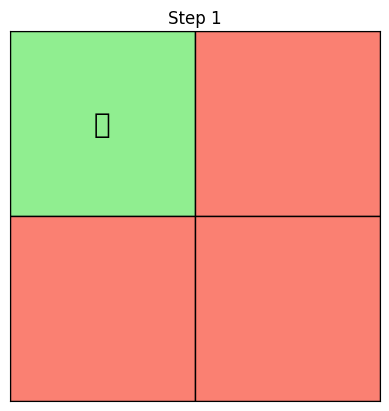

Step 2: Agent at (0, 0), Status: Clean, Action: (0, 1)


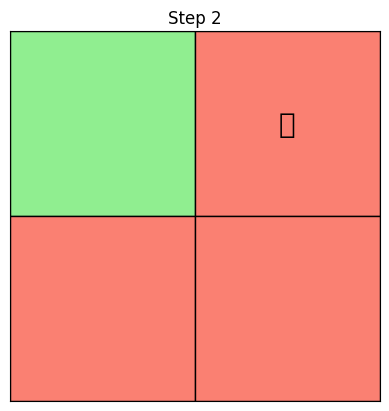

Step 3: Agent at (0, 1), Status: Dirty, Action: Clean


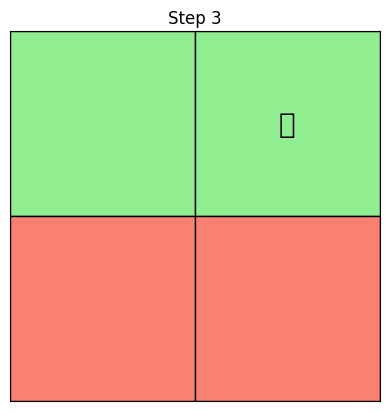

Step 4: Agent at (0, 1), Status: Clean, Action: (1, 0)


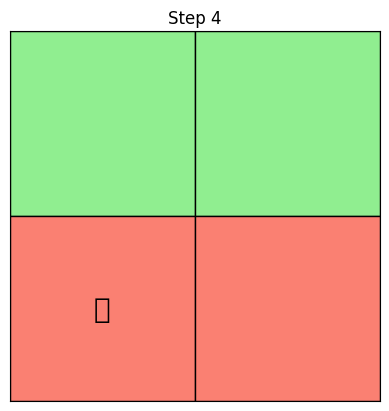

Step 5: Agent at (1, 0), Status: Dirty, Action: Clean


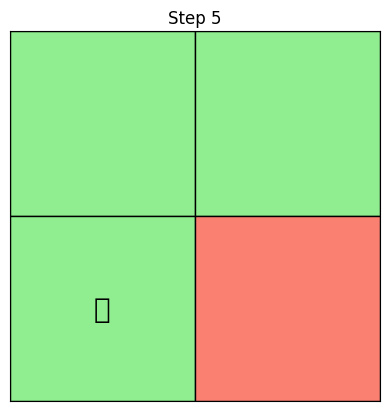

Step 6: Agent at (1, 0), Status: Clean, Action: (1, 1)


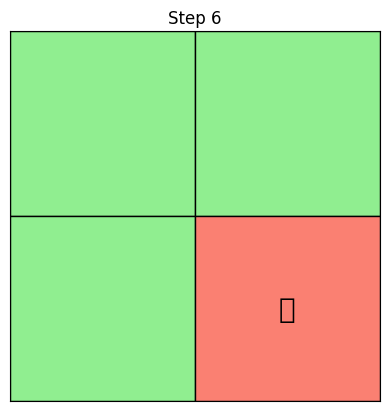

Step 7: Agent at (1, 1), Status: Dirty, Action: Clean


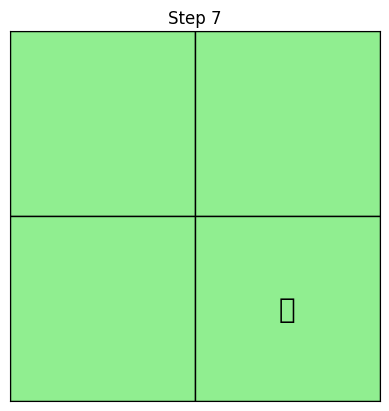

In [1]:
import matplotlib.pyplot as plt
import random
import time

# Initialize 2x2 grid environment with all dirty
grid = {
    (0, 0): 'Dirty',
    (0, 1): 'Dirty',
    (1, 0): 'Dirty',
    (1, 1): 'Dirty'
}

# Agent starts at (0, 0)
agent_pos = (0, 0)

# Simple reflex agent function
def reflex_agent(position, status):
    if status == 'Dirty':
        return 'Clean'
    else:
        # Random movement (up/down/left/right) within grid
        moves = {
            'up': (position[0]-1, position[1]),
            'down': (position[0]+1, position[1]),
            'left': (position[0], position[1]-1),
            'right': (position[0], position[1]+1)
        }
        valid_moves = [pos for pos in moves.values() if pos in grid]
        return random.choice(valid_moves)

# Visualization function
def visualize(grid, agent_pos, step):
    color_map = {'Clean': 'lightgreen', 'Dirty': 'salmon'}
    fig, ax = plt.subplots()
    plt.title(f"Step {step}")

    # 4 grid cells are drawn
    for x in [0, 1]:
        for y in [0, 1]:
            status = grid.get((x, y), 'Dirty')
            # Draw each room
            rect = plt.Rectangle((y, 1 - x), 1, 1, facecolor=color_map[status], edgecolor='black')
            ax.add_patch(rect)

            # Draw agent
            if (x, y) == agent_pos:
                ax.text(y + 0.5, 1 - x + 0.5, '🤖', ha='center', va='center', fontsize=20)

    # Set correct plot limits and formatting
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    plt.pause(1.0)
    plt.close()



# Keep track of visited positions
visited = set()

# Improved reflex agent (cleans or visits new cells)
def reflex_agent(position, status):
    if status == 'Dirty':
        return 'Clean'
    else:
        # Move to any unvisited or randomly if all visited
        possible_moves = [
            (0, 0), (0, 1),
            (1, 0), (1, 1)
        ]
        unvisited = [pos for pos in possible_moves if pos not in visited]
        if unvisited:
            return unvisited[0]  # visit next unvisited
        else:
            return random.choice(possible_moves)  # fallback

# Simulation loop (run until all rooms are clean)
step = 1
while 'Dirty' in grid.values():
    status = grid[agent_pos]
    action = reflex_agent(agent_pos, status)

    print(f"Step {step}: Agent at {agent_pos}, Status: {status}, Action: {action}")

    if action == 'Clean':
        grid[agent_pos] = 'Clean'
        visited.add(agent_pos)
    else:
        agent_pos = action

    visualize(grid, agent_pos, step)
    step += 1